# Final Project
## Joshua Grou and Raja Agireddy

In [5]:
import torch
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=0)

#images, labels = next(img_gen.flow_from_directory('./Data/train'))

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [5]:
transform= torchvision.transforms.Compose([torchvision.transforms.Resize((100,100)),ToTensor()])

training_data = torchvision.datasets.ImageFolder('./Data/train', transform = transform)
testing_data = torchvision.datasets.ImageFolder('./Data/test', transform = transform)
validation_data = torchvision.datasets.ImageFolder('./Data/valid', transform = transform)

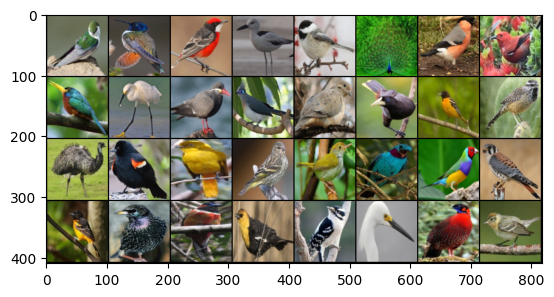

VIOLET GREEN SWALLOW ECUADORIAN HILLSTAR CRIMSON CHAT CRAB PLOVER BLACK-CAPPED CHICKADEE PEACOCK EURASIAN BULLFINCH APAPANE GREAT JACAMAR SNOWY EGRET INCA TERN CRESTED COUA MOURNING DOVE CRESTED OROPENDOLA BALTIMORE ORIOLE CACTUS WREN EMU   RED WINGED BLACKBIRD GOLDEN BOWER BIRD ANDEAN SISKIN TAILORBIRD SPANGLED COTINGA GOULDIAN FINCH AMERICAN KESTREL BALTIMORE ORIOLE COMMON STARLING RED NAPED TROGON YELLOW HEADED BLACKBIRD DOWNY WOODPECKER SNOWY EGRET SATYR TRAGOPAN BAY-BREASTED WARBLER


In [6]:
batch_size = 32
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers = 4)
test_dataloader = DataLoader(testing_data, batch_size=batch_size, shuffle=True, num_workers = 4)
def imshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
classes = training_data.classes
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

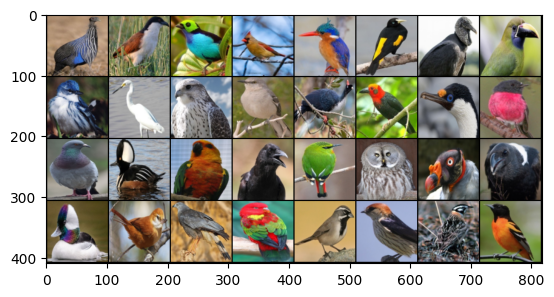

GroundTruth:  VULTURINE GUINEAFOWL COPPERY TAILED COUCAL PARADISE TANAGER NORTHERN CARDINAL


In [10]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

# EfficientNetV2-S

EfficientNetV2-S is designed to be a very small and fast training network that achieves accuracy similar to that of complex networks that take a very long time to train. This is ideal for this type of project as we will be able to explore the implementation of training and optimization of neural networks without requiring very powerful computational resources.

In [6]:
from torchvision.models import efficientnet_v2_s
from torch.optim import lr_scheduler
from torch import nn
from torch import optim
import time
import copy
import os

# 1. Create Data Sets

In [3]:
batch_size = 32
num_workers = 8

transform= torchvision.transforms.Compose([torchvision.transforms.Resize((224,224)),ToTensor()])

training_data = torchvision.datasets.ImageFolder('./Data/train', transform = transform)
testing_data = torchvision.datasets.ImageFolder('./Data/test', transform = transform)
validation_data = torchvision.datasets.ImageFolder('./Data/valid', transform = transform)

train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers = num_workers)
test_loader = DataLoader(testing_data, batch_size=batch_size, shuffle=True, num_workers = num_workers)
validation_loader = DataLoader(validation_data, batch_size=batch_size, shuffle=True, num_workers = num_workers)

# 2. Create Model and Optimzer

Use cross entropy as the loss for the model and ADAM optimizer with small learning rate of 0.001. Here we will start using a model that does not have pre-trained weights, we will also explore a model that uses pre-trained weights and apply transfer learning to it.

In [4]:
lr = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = efficientnet_v2_s(pre_trained=True)
model.classifier = nn.Linear(1280, 450)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.Adam(model.parameters(), lr=lr)


# Decay LR by a factor of 0.1 every 7 epochs
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# 3. Train the Model

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.empty_cache()
# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

model.train()

total_step = len(train_loader)
curr_lr = lr
best_score = 0
num_epochs = 10
model = model.to(device)

for epoch in range(num_epochs):
    total_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        g_labels = model(images)
        loss = criterion(g_labels, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        if (i+1) % 100 == 0:
            print('{} / {}'.format(batch_size*(i+1), len(training_data)))
            
    model.eval()
    score = 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(val_loader):
            images = images.to(device)
            labels = labels.to(device)

            g_labels = model(images)

            score += int(torch.max(g_labels, 1)[1][0] == labels[0])
        
    print('Epoch: {}, Loss: {:.4f}'.format(epoch+1, total_loss / total_step))
    avg = score / len(validation_data)
    print('Accuracy: {:.2f}\n'.format(avg))
    model.train()
    
    if best_score < avg:
        best_score = avg
        torch.save(model.state_dict(), './Models/EfficientNetv2_Init.pt')

cuda:0
3200 / 70626
6400 / 70626
9600 / 70626
12800 / 70626
16000 / 70626
19200 / 70626
22400 / 70626
25600 / 70626
28800 / 70626
32000 / 70626
35200 / 70626
38400 / 70626
41600 / 70626
44800 / 70626
48000 / 70626
51200 / 70626
54400 / 70626
57600 / 70626
60800 / 70626
64000 / 70626
67200 / 70626
70400 / 70626
Epoch: 1, Loss: 3.3414
Accuracy: 0.02

3200 / 70626
6400 / 70626
9600 / 70626
12800 / 70626
16000 / 70626
19200 / 70626
22400 / 70626
25600 / 70626
28800 / 70626
32000 / 70626
35200 / 70626
38400 / 70626
41600 / 70626
44800 / 70626
48000 / 70626
51200 / 70626
54400 / 70626
57600 / 70626
60800 / 70626
64000 / 70626
67200 / 70626
70400 / 70626
Epoch: 2, Loss: 2.2227
Accuracy: 0.02

3200 / 70626
6400 / 70626
9600 / 70626
12800 / 70626
16000 / 70626
19200 / 70626
22400 / 70626
25600 / 70626
28800 / 70626
32000 / 70626
35200 / 70626
38400 / 70626
41600 / 70626
44800 / 70626
48000 / 70626
51200 / 70626
54400 / 70626
57600 / 70626
60800 / 70626
64000 / 70626
67200 / 70626
70400 / 70626


# 4. Evalutation of 10 Epoch no pretraining

2250


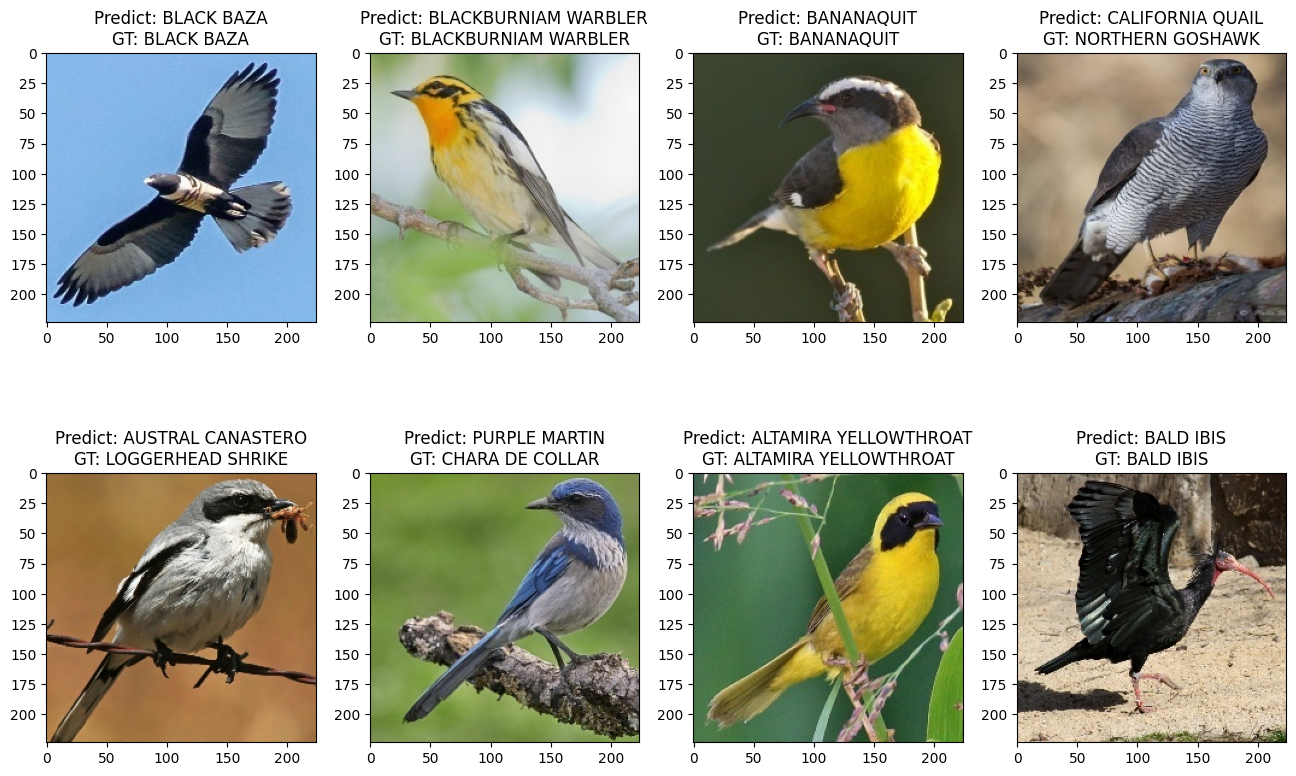

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.eval()
model.load_state_dict(torch.load('./Models/EfficientNetv2_init.pt', map_location=device))
model = model.to(device)


class_names = os.listdir('./Data/train/')
class_names.sort()
class_len = len(class_names)


print(len(test_dataset))
_, ax = plt.subplots(2, 4, figsize=(16,10))

for i in range(8):
    data = test_dataset.__getitem__(np.random.choice(range(len(test_dataset))))
    
    image = data[0].cpu().detach().numpy().transpose(1, 2, 0) * 255
    image = image.astype(np.uint32)
    
    label = data[1]
    
    idx = torch.max(model(data[0].unsqueeze(0).to(device)), 1)[1][0].item()
    
    ax[i//4][i-(i//4)*4].imshow(image)
    ax[i//4][i-(i//4)*4].set_title('Predict: {}\nGT: {}'.format(class_names[idx], class_names[label]))

We can try to visualize what the convolutional layers are doing here

In [21]:
features = []

hook1 = model.blocks[0].register_forward_hook(hook)
hook2 = model.blocks[1].register_forward_hook(hook)
hook3 = model.blocks[2].register_forward_hook(hook)
hook4 = model.blocks[3].register_forward_hook(hook)

_ = model(data[0].unsqueeze(0).to(device))

hook1.remove()
hook2.remove()
hook3.remove()
hook4.remove()

_, ax = plt.subplots(1, 4, figsize=(16,10))
for i in range(len(features)):
    ax[i].imshow(features[i][0].transpose(0, 2).transpose(0, 1).sum(-1).detach().cpu().numpy(), cmap='jet')

AttributeError: 'EfficientNet' object has no attribute 'blocks'

In [21]:
preds = []
gts = []

torch.cuda.empty_cache()

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = model.forward(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        gts.append(labels)
        preds.append(predicted)

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 82 %


In [26]:
# prepare to count predictions for each class

correct_pred = {classname: 0 for classname in class_names}
total_pred = {classname: 0 for classname in class_names}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[class_names[label]] += 1
            total_pred[class_names[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: ABBOTTS BABBLER is 60.0 %
Accuracy for class: ABBOTTS BOOBY is 0.0 %
Accuracy for class: ABYSSINIAN GROUND HORNBILL is 80.0 %
Accuracy for class: AFRICAN CROWNED CRANE is 100.0 %
Accuracy for class: AFRICAN EMERALD CUCKOO is 80.0 %
Accuracy for class: AFRICAN FIREFINCH is 60.0 %
Accuracy for class: AFRICAN OYSTER CATCHER is 80.0 %
Accuracy for class: AFRICAN PIED HORNBILL is 100.0 %
Accuracy for class: ALBATROSS is 80.0 %
Accuracy for class: ALBERTS TOWHEE is 80.0 %
Accuracy for class: ALEXANDRINE PARAKEET is 100.0 %
Accuracy for class: ALPINE CHOUGH is 80.0 %
Accuracy for class: ALTAMIRA YELLOWTHROAT is 40.0 %
Accuracy for class: AMERICAN AVOCET is 80.0 %
Accuracy for class: AMERICAN BITTERN is 80.0 %
Accuracy for class: AMERICAN COOT is 100.0 %
Accuracy for class: AMERICAN FLAMINGO is 80.0 %
Accuracy for class: AMERICAN GOLDFINCH is 100.0 %
Accuracy for class: AMERICAN KESTREL is 100.0 %
Accuracy for class: AMERICAN PIPIT is 100.0 %
Accuracy for class: AMERICAN RE

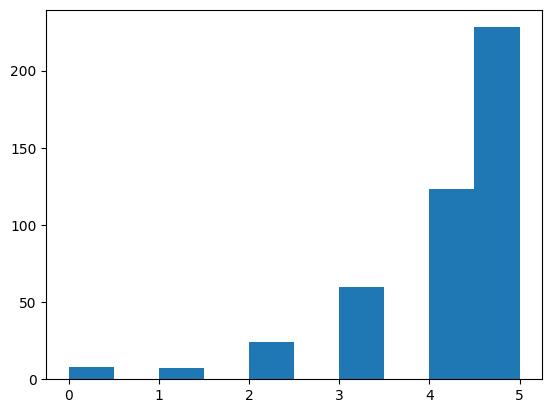

In [31]:
hist_list = []
for classname,correct_count in correct_pred.items():
    hist_list.append(correct_count)
plt.hist(hist_list)
plt.show()

# Code Structure Improvement and Exploration

While the results that were obtained here were good for a first pass it could likely be improved perhaps by training the model for more epochs, before trying this we will however improve the code structure so that it is easier to work with.

In [18]:
def train_model(model,optimizer,criterion,num_epochs,lr, train_loader, validation_loader,training_data, model_save_path):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    torch.cuda.empty_cache()
    # Assuming that we are on a CUDA machine, this should print a CUDA device:
    model.train()

    total_step = len(train_loader)
    curr_lr = lr
    best_score = 0
    model = model.to(device)

    for epoch in range(num_epochs):
        total_loss = 0
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            g_labels = model(images)
            loss = criterion(g_labels, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            if (i+1) % 100 == 0:
                print('{} / {}'.format(batch_size*(i+1), len(training_data)))

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data in validation_loader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                # calculate outputs by running images through the network
                outputs = model.forward(images)
                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        curr_score = 100 * correct // total
        print('Epoch: {}, Loss: {:.4f}'.format(epoch+1, total_loss / total_step))
        print(f'Accuracy of the network on the validation images: {curr_score} %')
        model.train()

        if best_score < curr_score:
            best_score = curr_score
            torch.save(model.state_dict(), model_save_path)
            
def evaluate_performance(model,model_save_path,class_names,test_dataset,test_loader):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model.eval()
    model.load_state_dict(torch.load(model_save_path, map_location=device))
    model = model.to(device)
    #display some sample images with their predictions
    _, ax = plt.subplots(2, 4, figsize=(16,10))
    with torch.no_grad():
        for i in range(8):
            data = test_dataset.__getitem__(np.random.choice(range(len(test_dataset))))

            image = data[0].cpu().detach().numpy().transpose(1, 2, 0) * 255
            image = image.astype(np.uint32)

            label = data[1]

            idx = torch.max(model(data[0].unsqueeze(0).to(device)), 1)[1][0].item()

            ax[i//4][i-(i//4)*4].imshow(image)
            ax[i//4][i-(i//4)*4].set_title('Predict: {}\nGT: {}'.format(class_names[idx], class_names[label]))
    #calculate accruacy over entire test set
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            # calculate outputs by running images through the network
            outputs = model.forward(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the test images: {100 * correct // total} %')
    correct_pred = {classname: 0 for classname in class_names}
    total_pred = {classname: 0 for classname in class_names}
    # again no gradients needed
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[class_names[label]] += 1
                total_pred[class_names[label]] += 1
    #display a histogram of correct predictions by class
        hist_list = []
    for classname,correct_count in correct_pred.items():
        hist_list.append(correct_count)
    plt.figure()
    plt.hist(hist_list)
    plt.title("Histogram of Correct Predictions by Class")
    plt.xlabel("Number of Correct Predictions (Out of 5)")
    plt.ylabel("Number of Classes")
    plt.show()

Now that the evaluation and training code has been better structured lets try to train the model with more epochs this time.

In [10]:
lr = 0.001
num_epochs = 20
model_save_path = "./Models/EfficientNetV2_20Epoch.pt"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = efficientnet_v2_s(pre_trained=True)
model.classifier = nn.Linear(1280, 450)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

train_model(model,optimizer,criterion,num_epochs,lr, train_loader, validation_loader,training_data, model_save_path)

3200 / 70626
6400 / 70626
9600 / 70626
12800 / 70626
16000 / 70626
19200 / 70626
22400 / 70626
25600 / 70626
28800 / 70626
32000 / 70626
35200 / 70626
38400 / 70626
41600 / 70626
44800 / 70626
48000 / 70626
51200 / 70626
54400 / 70626
57600 / 70626
60800 / 70626
64000 / 70626
67200 / 70626
70400 / 70626
Epoch: 1, Loss: 5.0974
Accuracy of the network on the validation images: 15 %
3200 / 70626
6400 / 70626
9600 / 70626
12800 / 70626
16000 / 70626
19200 / 70626
22400 / 70626
25600 / 70626
28800 / 70626
32000 / 70626
35200 / 70626
38400 / 70626
41600 / 70626
44800 / 70626
48000 / 70626
51200 / 70626
54400 / 70626
57600 / 70626
60800 / 70626
64000 / 70626
67200 / 70626
70400 / 70626
Epoch: 2, Loss: 3.4826
Accuracy of the network on the validation images: 45 %
3200 / 70626
6400 / 70626
9600 / 70626
12800 / 70626
16000 / 70626
19200 / 70626
22400 / 70626
25600 / 70626
28800 / 70626
32000 / 70626
35200 / 70626
38400 / 70626
41600 / 70626
44800 / 70626
48000 / 70626
51200 / 70626
54400 / 70626

Accuracy of the network on the test images: 93 %


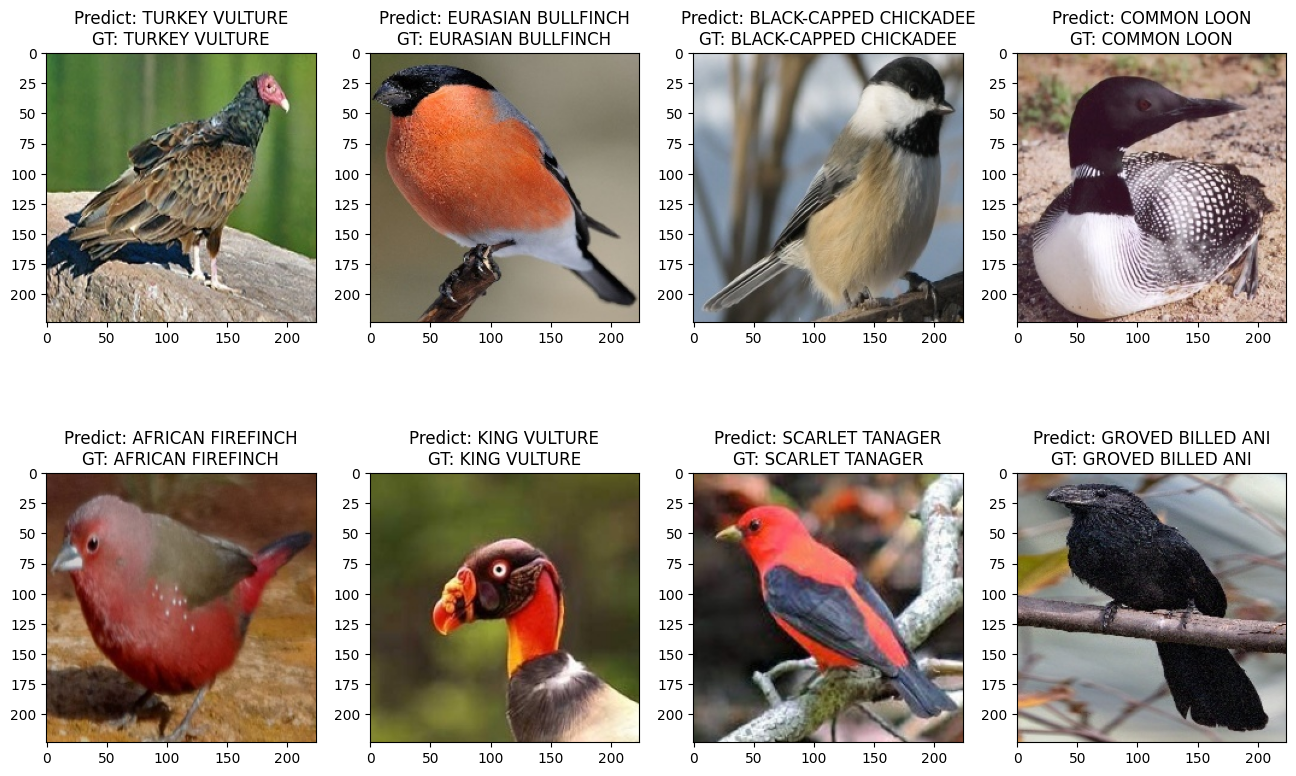

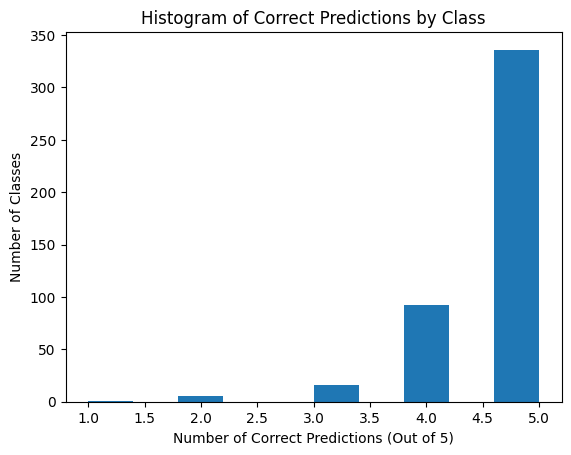

In [20]:
class_names = os.listdir('./Data/train/')
class_names.sort()
class_len = len(class_names)
evaluate_performance(model,model_save_path,class_names,testing_data,test_loader)